In [1]:
import pandas as pd
import numpy as np

pokemons = pd.read_csv("pokemon.csv")


pokemons.at[773, 'capture_rate'] = '30'
pokemons.at[773, 'attack'] = np.int64(60)
pokemons.at[773, 'defense'] = np.int64(100)
pokemons.at[773, 'sp_attack'] = np.int64(60)
pokemons.at[773, 'sp_defense'] = np.int64(100)
pokemons.at[773, 'speed'] = np.int64(60)
pokemons.at[773, 'base_total'] = np.int64(440)

pokemons.at[719, 'classfication'] = 'Mischief Pokémon'
pokemons.at[719, 'attack'] = np.int64(110)
pokemons.at[719, 'defense'] = np.int64(60)
pokemons.at[719, 'sp_attack'] = np.int64(150)
pokemons.at[719, 'sp_defense'] = np.int64(130)
pokemons.at[719, 'speed'] = np.int64(70)
pokemons.at[719, 'base_total'] = np.int64(600)
pokemons.at[719, 'height_m'] = np.int64(0.5)
pokemons.at[719, 'weight_kg'] = np.int64(9)


print(pokemons.loc[719])
print(sum(pokemons['height_m'].isnull()))
print(sum(pokemons['weight_kg'].isnull()))
print(pokemons['name'][pokemons['height_m'].isnull()])
print(pokemons['name'][pokemons['weight_kg'].isnull()])

pokemons['capture_rate'] = pokemons['capture_rate'].astype(np.int64)
pokemons['genderless'] = pokemons['percentage_male'].isnull() + 0

abilities                                ['Magician']
against_bug                                       1.0
against_dark                                      4.0
against_dragon                                    1.0
against_electric                                  1.0
against_fairy                                     1.0
against_fight                                     0.0
against_fire                                      1.0
against_flying                                    1.0
against_ghost                                     4.0
against_grass                                     1.0
against_ground                                    1.0
against_ice                                       1.0
against_normal                                    0.0
against_poison                                    0.5
against_psychic                                   0.5
against_rock                                      1.0
against_steel                                     1.0
against_water               

In [2]:
print("\n".join([f'{i}: {v}' for i, v in enumerate(pokemons.columns.values)]))

0: abilities
1: against_bug
2: against_dark
3: against_dragon
4: against_electric
5: against_fairy
6: against_fight
7: against_fire
8: against_flying
9: against_ghost
10: against_grass
11: against_ground
12: against_ice
13: against_normal
14: against_poison
15: against_psychic
16: against_rock
17: against_steel
18: against_water
19: attack
20: base_egg_steps
21: base_happiness
22: base_total
23: capture_rate
24: classfication
25: defense
26: experience_growth
27: height_m
28: hp
29: japanese_name
30: name
31: percentage_male
32: pokedex_number
33: sp_attack
34: sp_defense
35: speed
36: type1
37: type2
38: weight_kg
39: generation
40: is_legendary
41: genderless


In [3]:
print("\n".join([f'{i}: {type(v)}' for i, v in enumerate(pokemons.loc[0])]))

0: <class 'str'>
1: <class 'numpy.float64'>
2: <class 'numpy.float64'>
3: <class 'numpy.float64'>
4: <class 'numpy.float64'>
5: <class 'numpy.float64'>
6: <class 'numpy.float64'>
7: <class 'numpy.float64'>
8: <class 'numpy.float64'>
9: <class 'numpy.float64'>
10: <class 'numpy.float64'>
11: <class 'numpy.float64'>
12: <class 'numpy.float64'>
13: <class 'numpy.float64'>
14: <class 'numpy.float64'>
15: <class 'numpy.float64'>
16: <class 'numpy.float64'>
17: <class 'numpy.float64'>
18: <class 'numpy.float64'>
19: <class 'numpy.int64'>
20: <class 'numpy.int64'>
21: <class 'numpy.int64'>
22: <class 'numpy.int64'>
23: <class 'numpy.int64'>
24: <class 'str'>
25: <class 'numpy.int64'>
26: <class 'numpy.int64'>
27: <class 'numpy.float64'>
28: <class 'numpy.int64'>
29: <class 'str'>
30: <class 'str'>
31: <class 'numpy.float64'>
32: <class 'numpy.int64'>
33: <class 'numpy.int64'>
34: <class 'numpy.int64'>
35: <class 'numpy.int64'>
36: <class 'str'>
37: <class 'str'>
38: <class 'numpy.float64'>
39

<AxesSubplot:xlabel='capture_rate', ylabel='Count'>

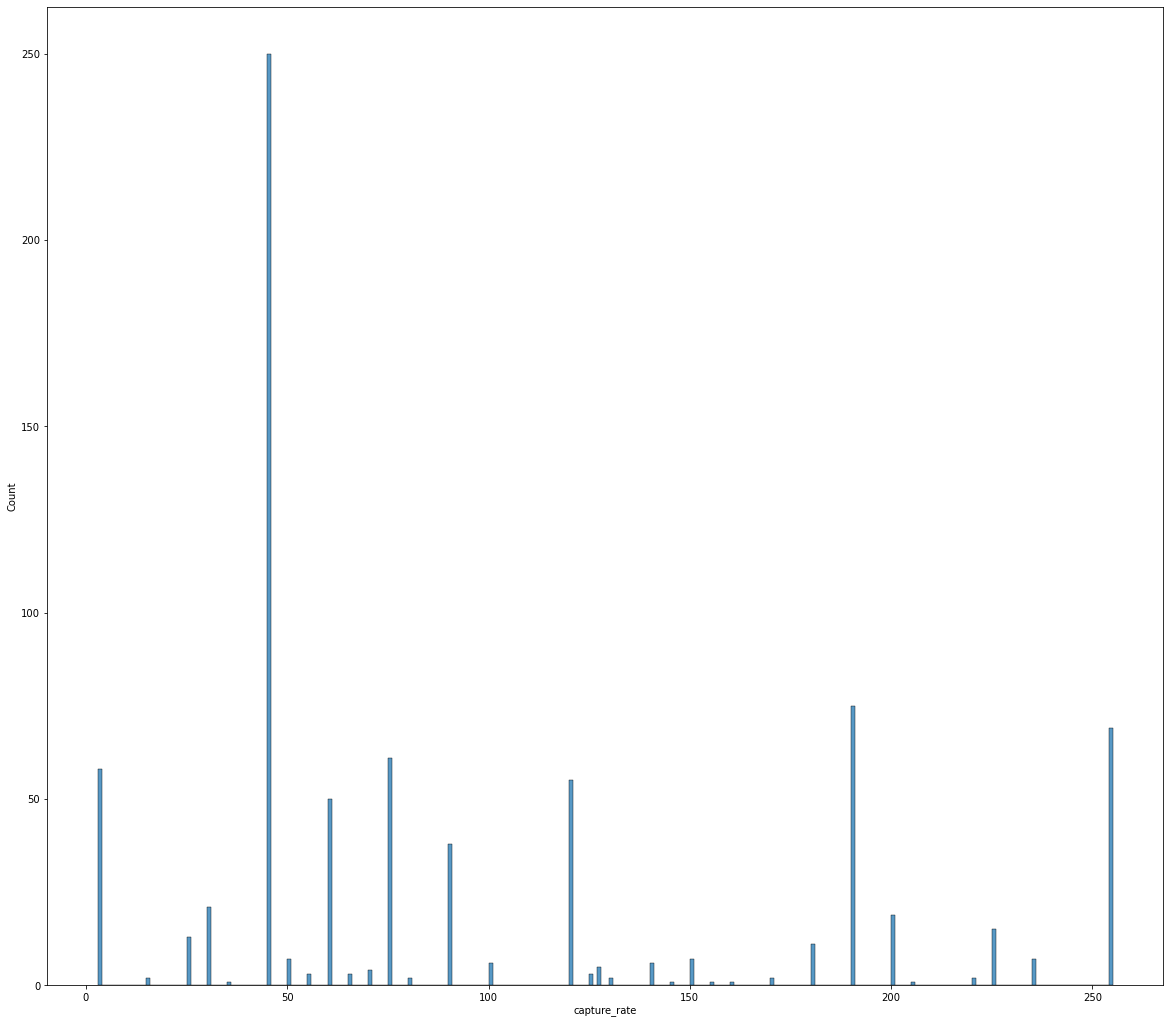

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.subplots(figsize=(20, 18))
#sns.histplot(pokemons, x='type1', y='type2')
#sns.histplot(pokemons, x='type1')
sns.histplot(pokemons, x='capture_rate', binwidth=1)

<AxesSubplot:ylabel='Count'>

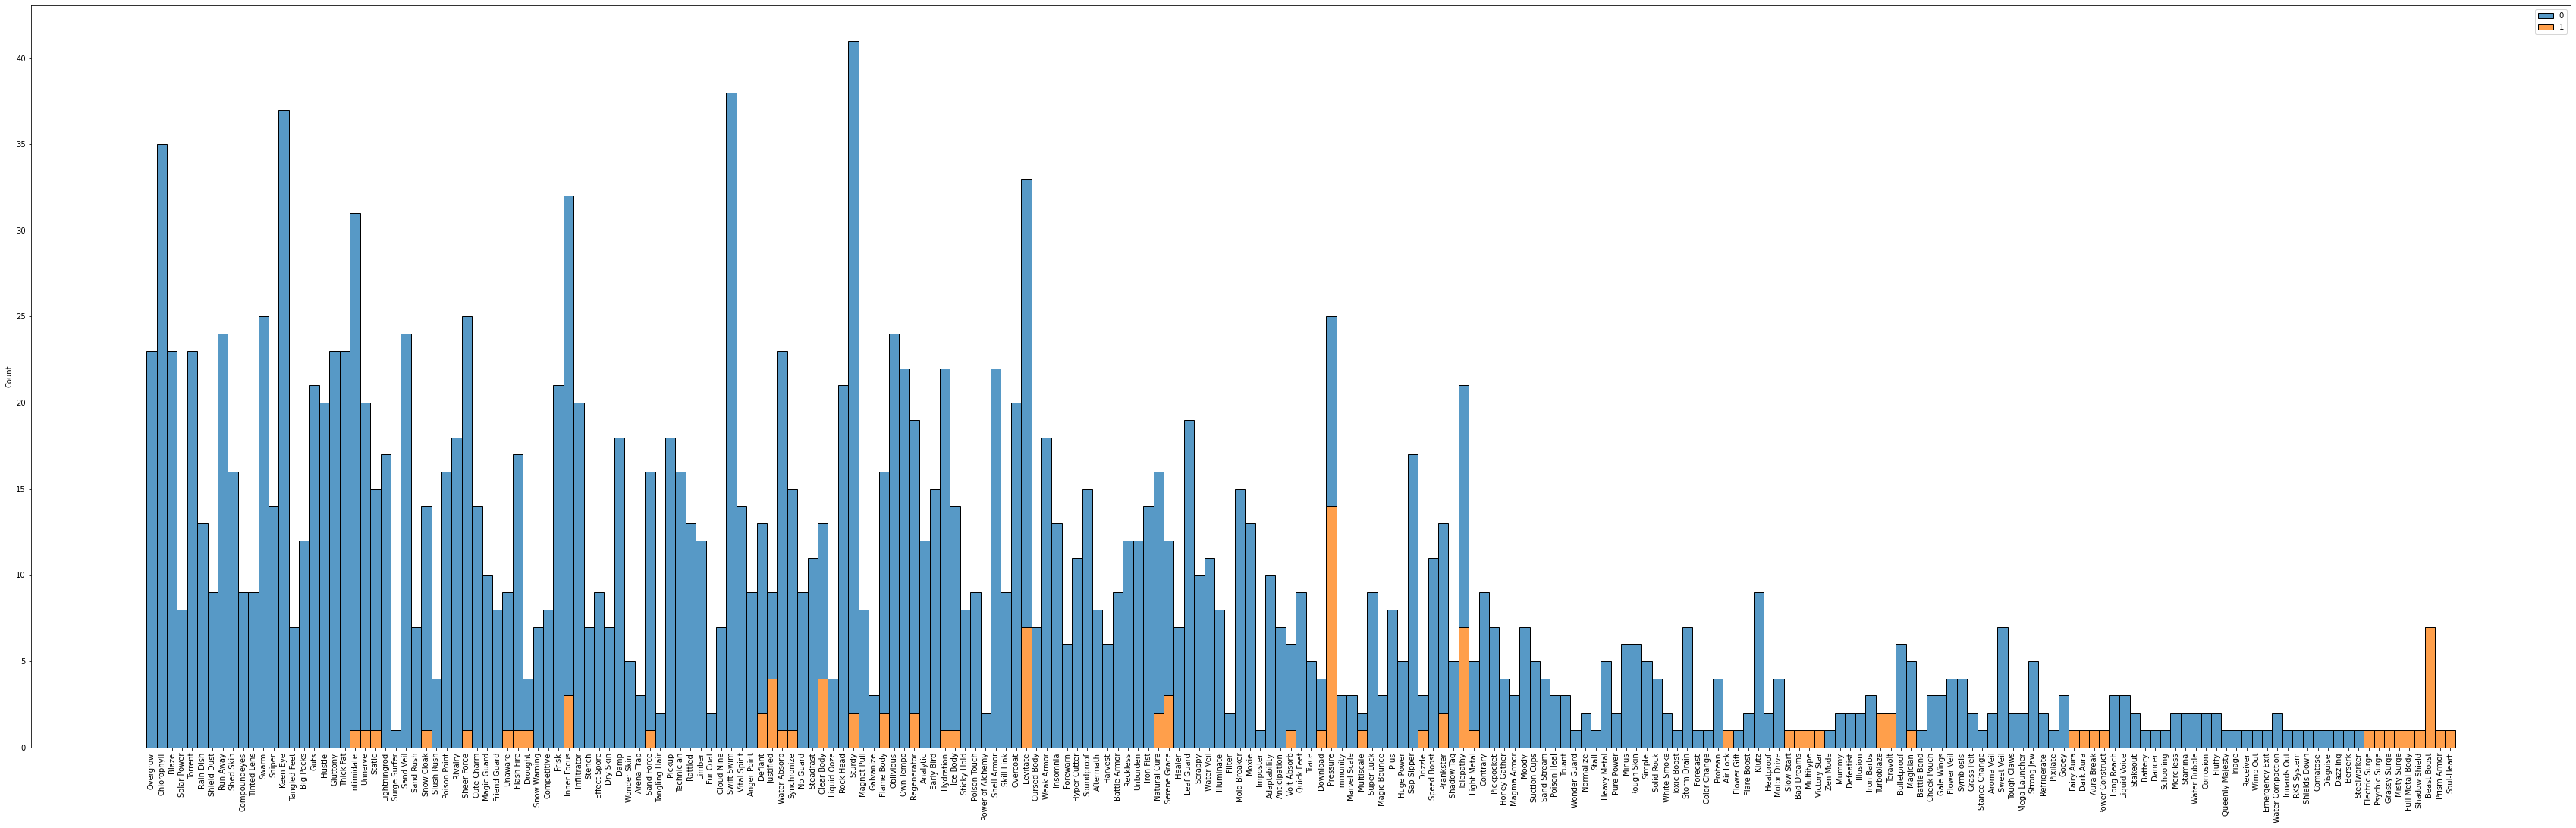

In [5]:
plt.subplots(figsize=(60, 18))
plt.xticks(rotation=90)

ab = []
il = []
for abilities, legendary in zip(pokemons['abilities'], pokemons['is_legendary']):
    abilities = eval(abilities)
    ab += abilities
    il += [legendary for _ in range(len(abilities))]
    
sns.histplot(x=ab, hue=il, multiple="stack")

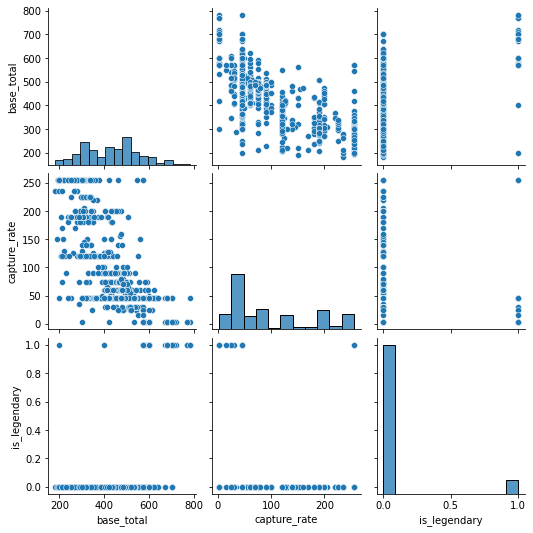

In [6]:
sns.pairplot(pokemons, vars=['base_total', 'capture_rate', 'is_legendary'])

<AxesSubplot:ylabel='Count'>

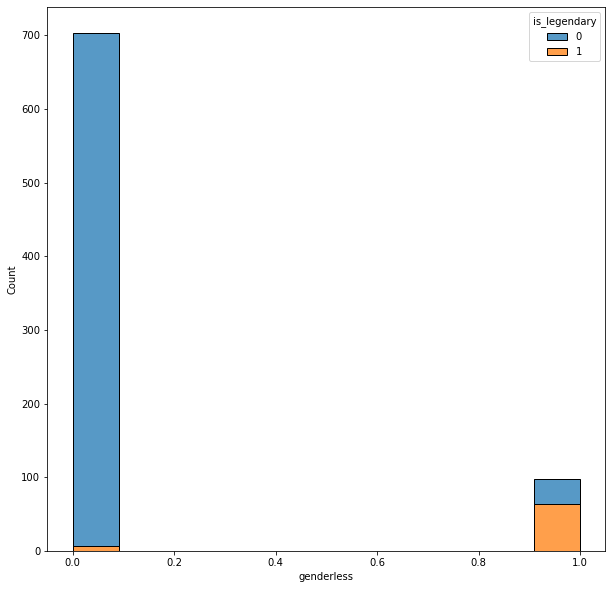

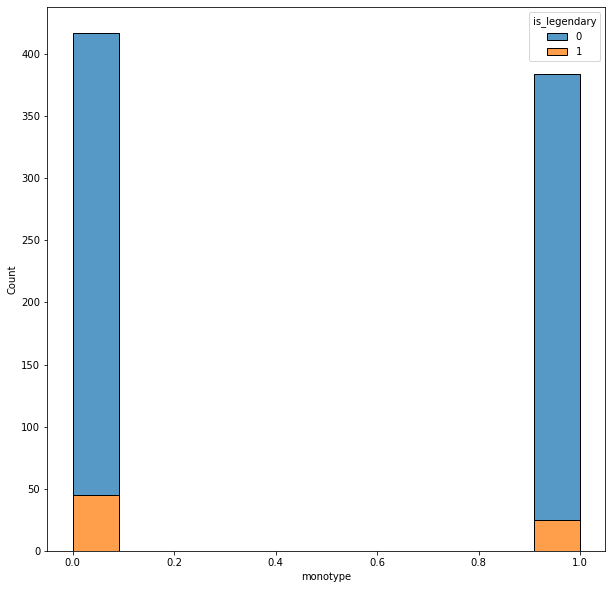

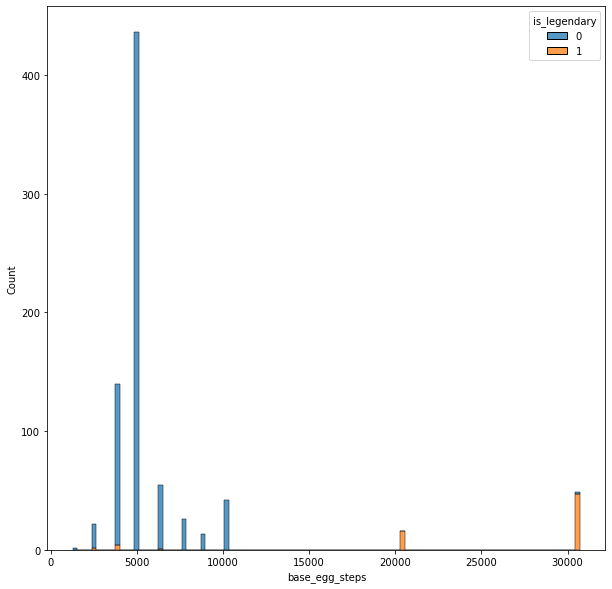

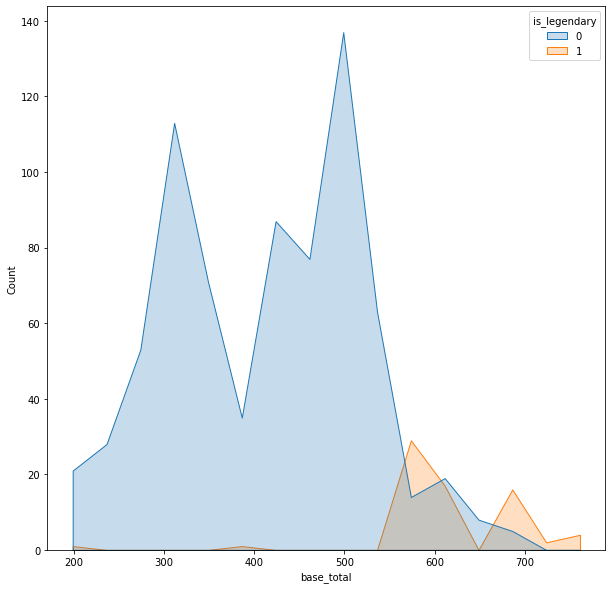

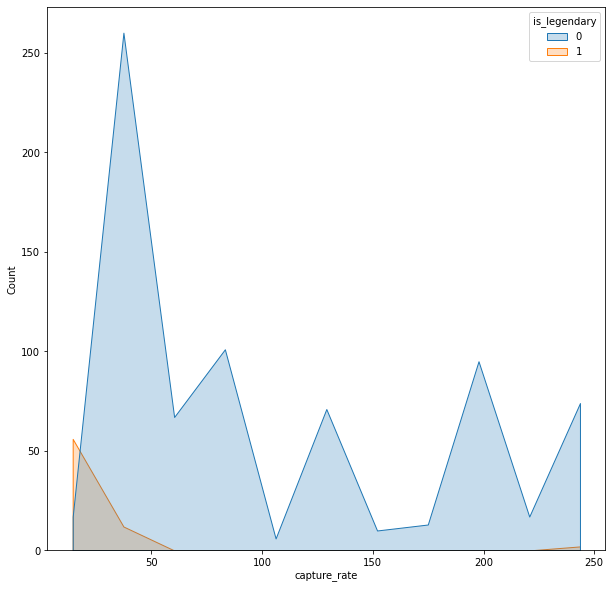

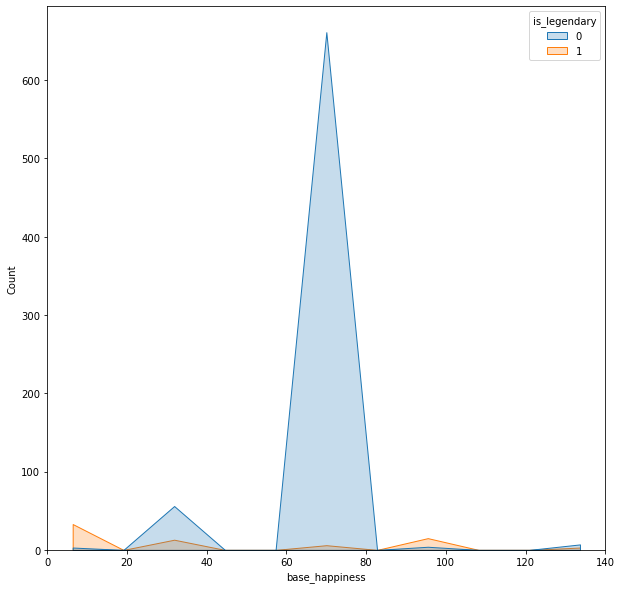

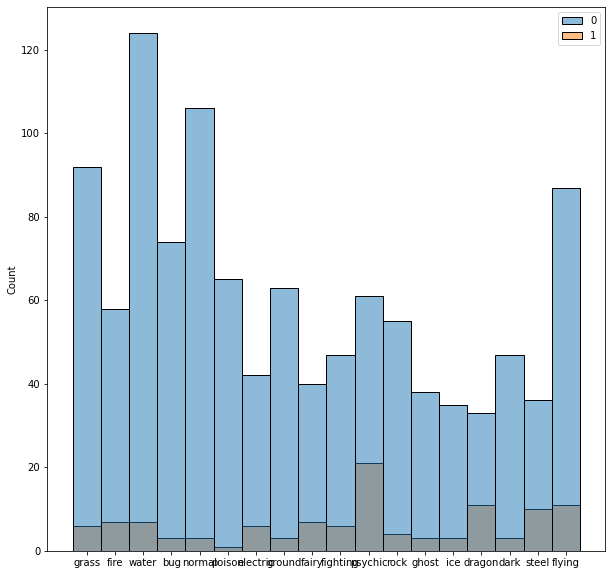

In [7]:
pokemons['monotype'] = pokemons['type2'].isnull() + 0
plt.subplots(figsize=(10, 10))
sns.histplot(pokemons, x="genderless", hue="is_legendary", multiple="stack")
plt.subplots(figsize=(10, 10))
sns.histplot(pokemons, x="monotype", hue="is_legendary", multiple="stack")
plt.subplots(figsize=(10, 10))
sns.histplot(pokemons, x="base_egg_steps", hue="is_legendary", multiple="stack")
plt.subplots(figsize=(10, 10))
sns.histplot(pokemons, x="base_total", hue="is_legendary", multiple="layer", element='poly')
plt.subplots(figsize=(10, 10))
sns.histplot(pokemons, x="capture_rate", hue="is_legendary", multiple="layer", element='poly')
plt.subplots(figsize=(10, 10))
sns.histplot(pokemons, x="base_happiness", hue="is_legendary", multiple="layer", element='poly')
plt.subplots(figsize=(10, 10))
pt = list(pokemons['type1']) + list(pokemons['type2'])
il = list(pokemons['is_legendary']) + list(pokemons['is_legendary'])
sns.histplot(x=pt, hue=il, multiple="layer")

In [8]:
print(pokemons['name'][(pokemons['is_legendary'] == 1) * (pokemons['base_egg_steps'] < 20000) == 1])
print(pokemons['base_egg_steps'][(pokemons['is_legendary'] == 1) * (pokemons['base_egg_steps'] < 20000) == 1])

484      Heatran
489      Manaphy
718      Diancie
784    Tapu Koko
785    Tapu Lele
786    Tapu Bulu
787    Tapu Fini
Name: name, dtype: object
484    2560
489    2560
718    6400
784    3840
785    3840
786    3840
787    3840
Name: base_egg_steps, dtype: int64


In [9]:
print(pokemons['name'][(pokemons['is_legendary'] == 1) * (pokemons['genderless'] == 0) == 1])

379       Latias
380       Latios
484      Heatran
487    Cresselia
640     Tornadus
641    Thundurus
644     Landorus
Name: name, dtype: object


In [10]:
print(pokemons['name'][(pokemons['is_legendary'] == 1) * (pokemons['base_happiness'] == 0) == 1])

149        Mewtwo
248         Lugia
249         Ho-Oh
381        Kyogre
382       Groudon
383      Rayquaza
385        Deoxys
482        Dialga
483        Palkia
485     Regigigas
486      Giratina
490       Darkrai
492        Arceus
642      Reshiram
643        Zekrom
645        Kyurem
648      Genesect
715       Xerneas
716       Yveltal
717       Zygarde
788        Cosmog
789       Cosmoem
790      Solgaleo
791        Lunala
792      Nihilego
793      Buzzwole
794     Pheromosa
795     Xurkitree
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, dtype: object


In [11]:
print(pokemons['name'][(pokemons['experience_growth'] > 1.6*1e6) == 1])

284    Shroomish
285      Breloom
295     Makuhita
296     Hariyama
313     Illumise
315       Gulpin
316       Swalot
319      Wailmer
320      Wailord
335      Seviper
340     Corphish
341    Crawdaunt
424     Drifloon
425     Drifblim
Name: name, dtype: object


In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

enc = MultiLabelBinarizer()
enc.fit(np.array(pokemons['type1']).reshape(-1, 1))
enc.transform([[t1] if mono else [t1, t2] for t1, t2, mono in zip(pokemons['type1'], pokemons['type2'], pokemons['monotype'])]).shape

(801, 18)

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

enc = MultiLabelBinarizer()
enc.fit(np.array(ab).reshape(-1, 1))
enc.transform([eval(ability) for ability in pokemons['abilities']]).shape

(801, 227)